<a href="https://colab.research.google.com/github/dhanno03/6220-final-report/blob/main/heart_disease_with_pycaret_and_pca_kaggleversion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Install and Import Dependencies

In [1]:
!pip install pycaret==2.3.6

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 301.5/301.5 kB 2.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 175.1/175.1 kB 7.5 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.7/17.7 MB 10.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.6/56.6 kB 3.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 43.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 324.4/324.4 kB 22.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 12.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 25.2/25.2 MB 26.4 MB/s eta 0:00:00
  error: subprocess-exited-with-error
  
  × pip subprocess to install build dependencies did not run successfully.
  │ exi

In [2]:
!pip install pandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
!pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 572.6/572.6 kB 10.1 MB/s eta 0:00:00


In [4]:
!pip install --pre pycaret

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 481.8/481.8 kB 9.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.5/212.5 kB 18.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 150.0/150.0 kB 14.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 9.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 26.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.9/16.9 MB 38.4 MB/s eta 0:00:00
  Using cached scikit_plot-0.3.7-py3-none-any.whl (33 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.2/77.2 kB 7.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 1.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.8/105.8 kB 6.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.2/81.2 kB 2.8 MB/s eta 0:00:0

In [5]:
!pip install pca

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [6]:
!pip install statsmodels 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [7]:
import pandas as pd
from pycaret.classification import *

# impots 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import itertools

import seaborn as sns
%matplotlib inline

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# 2. Load Data

In [8]:
df = pd.read_csv('https://raw.githubusercontent.com/dhanno03/6220-final-report/main/heart.csv')

In [9]:
df.head()

age  sex  cp  trtbps  chol  fbs  restecg  thalachh  exng  oldpeak  slp  \
0   63    1   3     145   233    1        0       150     0      2.3    0   
1   37    1   2     130   250    0        1       187     0      3.5    0   
2   41    0   1     130   204    0        0       172     0      1.4    2   
3   56    1   1     120   236    0        1       178     0      0.8    2   
4   57    0   0     120   354    0        1       163     1      0.6    2   

   caa  thall  output  
0    0      1       1  
1    0      2       1  
2    0      2       1  
3    0      2       1  
4    0      2       1

In [10]:
df.dtypes

age           int64
sex           int64
cp            int64
trtbps        int64
chol          int64
fbs           int64
restecg       int64
thalachh      int64
exng          int64
oldpeak     float64
slp           int64
caa           int64
thall         int64
output        int64
dtype: object

In [11]:
healthy = df[(df['output'] ==0) ].count()[1]
sick = df[(df['output'] ==1) ].count()[1]
print ("num of pepole without heart deacise: "+ str(healthy))
print ("num of pepole with chance for heart deacise: "+ str(sick))

num of pepole without heart deacise: 138
num of pepole with chance for heart deacise: 165


#3. Plots

### Exploratory Data Analysis

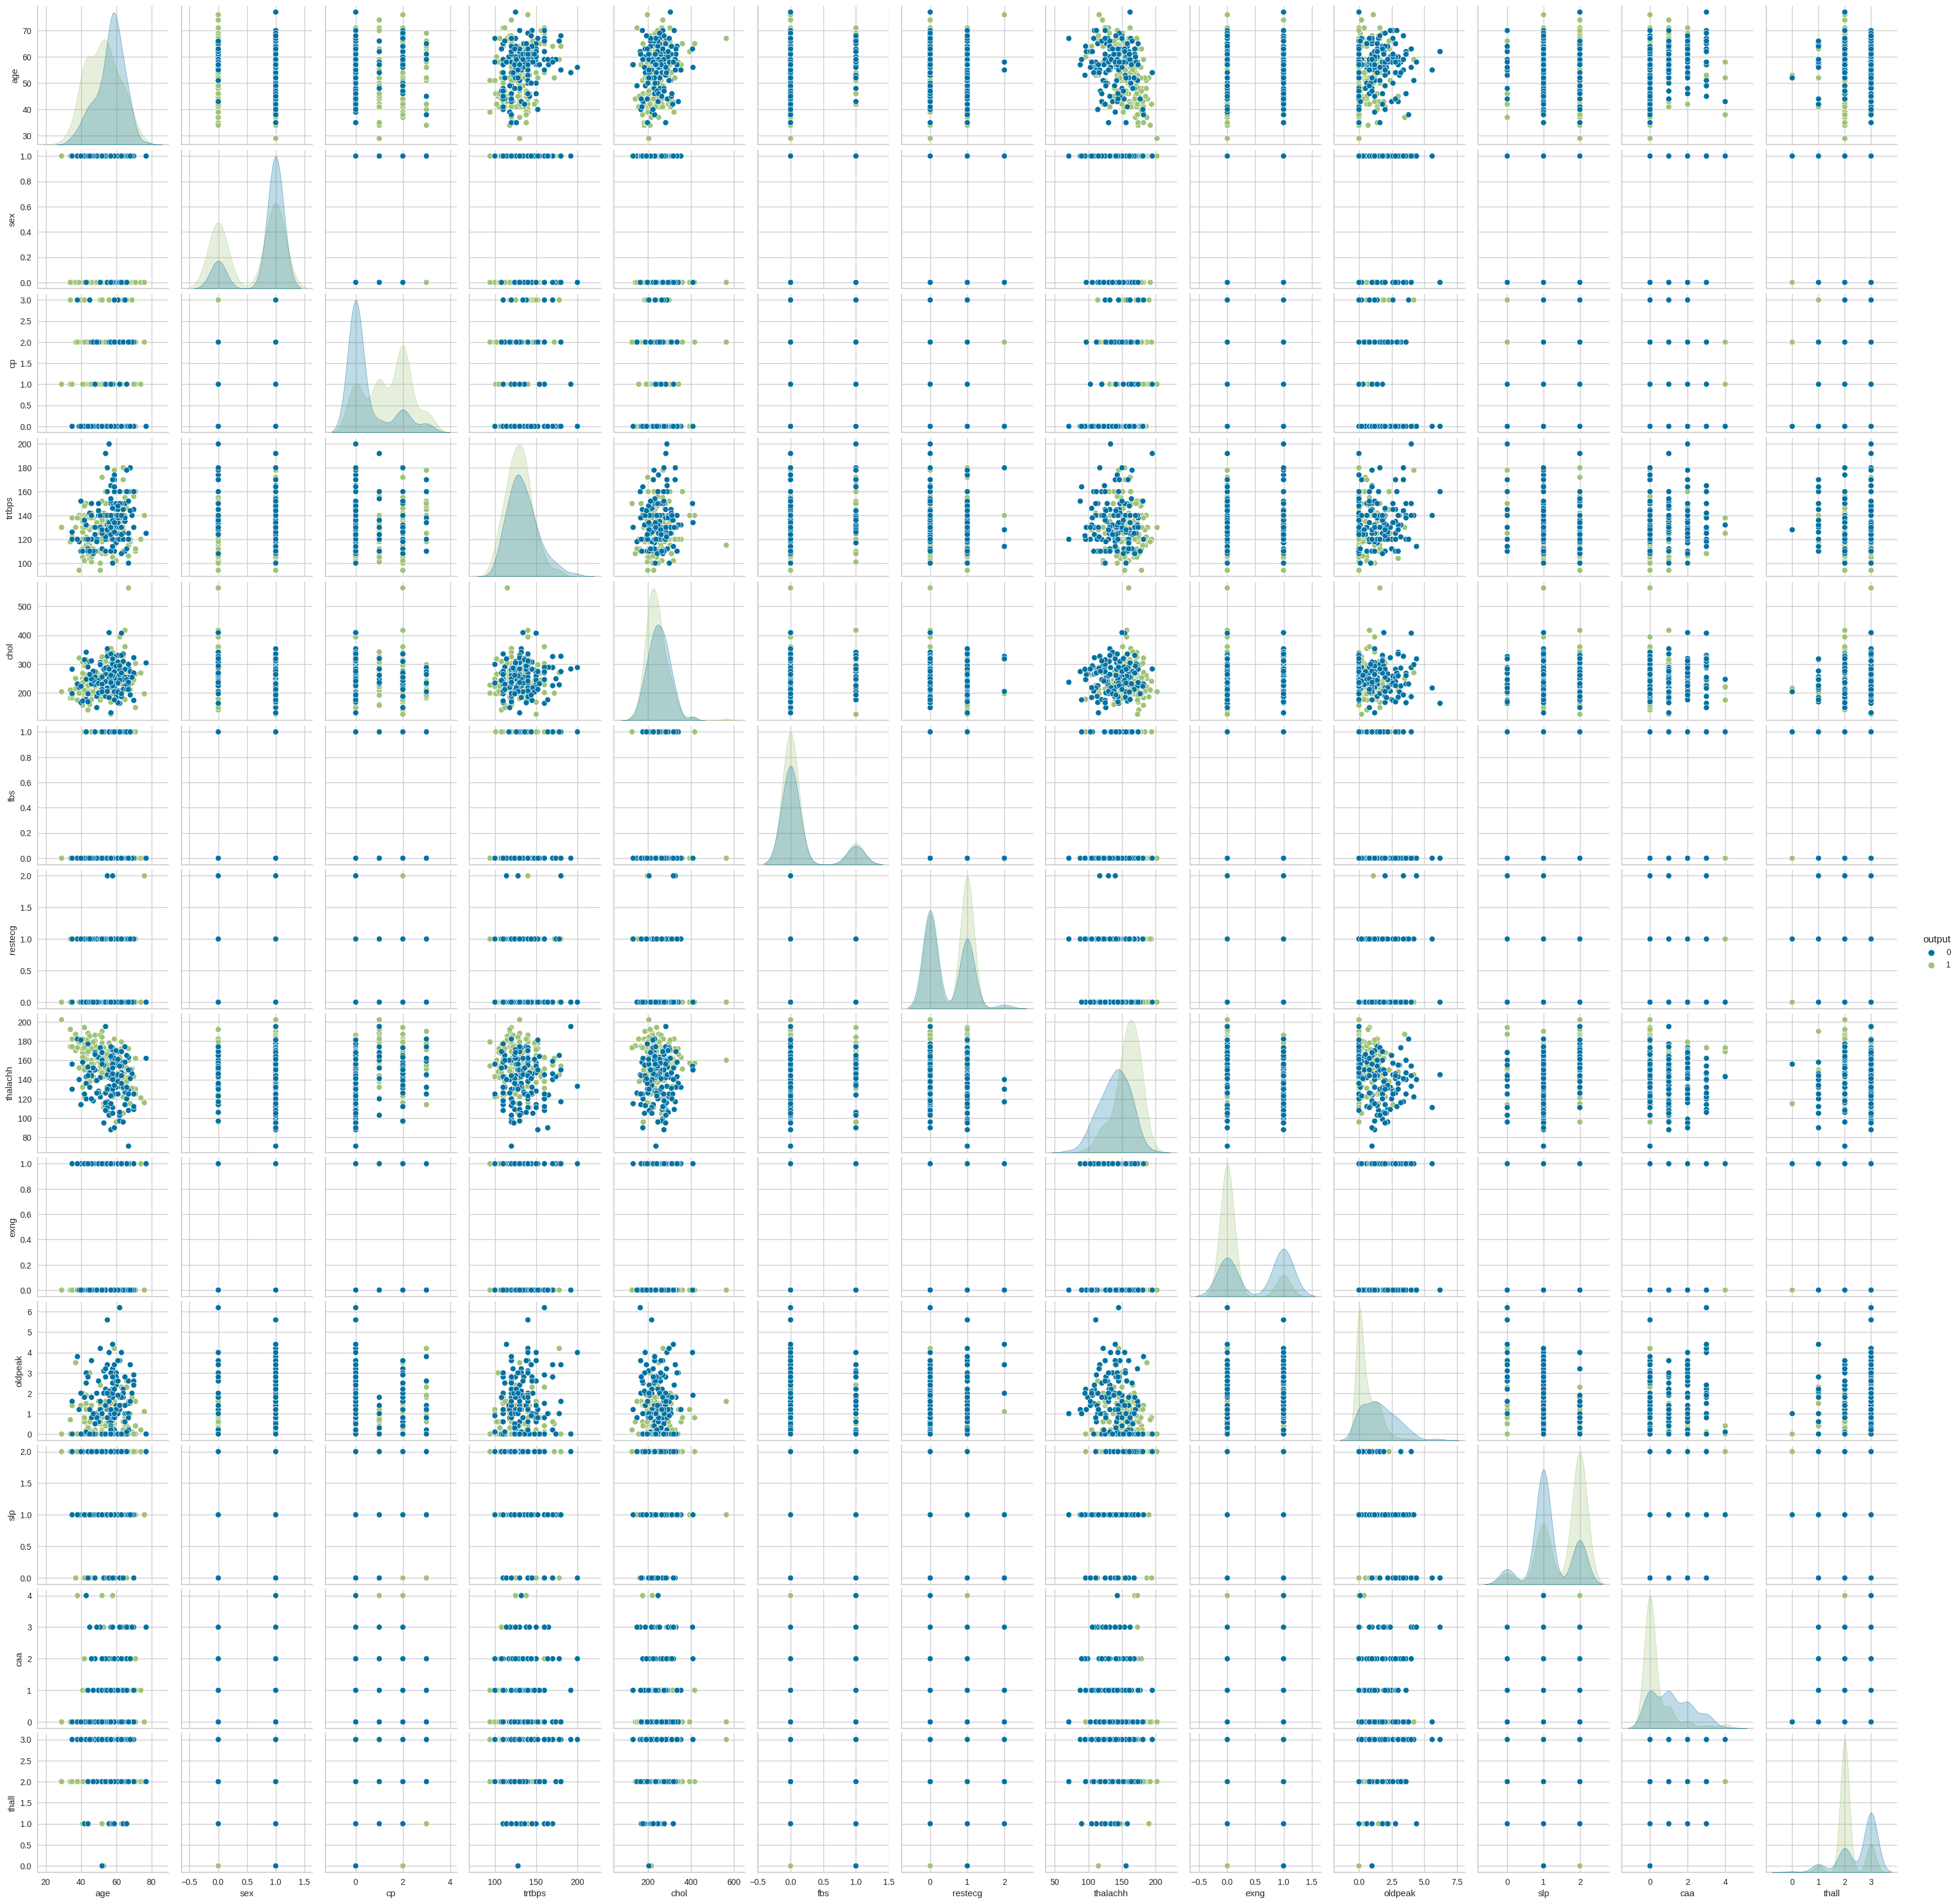

In [12]:
sns.pairplot(df,hue="output")
plt.show()

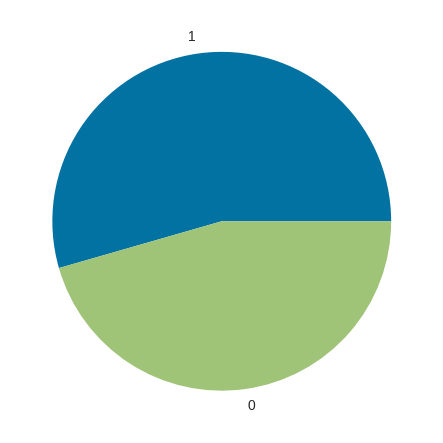

In [13]:
y=df['output']
y.value_counts().plot(kind='pie')
plt.ylabel('')
plt.show()


### Data Matrix

In [14]:
X = df.drop(columns=['output'])
X.head(10)

age  sex  cp  trtbps  chol  fbs  restecg  thalachh  exng  oldpeak  slp  \
0   63    1   3     145   233    1        0       150     0      2.3    0   
1   37    1   2     130   250    0        1       187     0      3.5    0   
2   41    0   1     130   204    0        0       172     0      1.4    2   
3   56    1   1     120   236    0        1       178     0      0.8    2   
4   57    0   0     120   354    0        1       163     1      0.6    2   
5   57    1   0     140   192    0        1       148     0      0.4    1   
6   56    0   1     140   294    0        0       153     0      1.3    1   
7   44    1   1     120   263    0        1       173     0      0.0    2   
8   52    1   2     172   199    1        1       162     0      0.5    2   
9   57    1   2     150   168    0        1       174     0      1.6    2   

   caa  thall  
0    0      1  
1    0      2  
2    0      2  
3    0      2  
4    0      2  
5    0      1  
6    0      2  
7    0      3  
8    0      3  
9    0      2

In [15]:
X.describe().transpose()

count        mean        std    min    25%    50%    75%    max
age       303.0   54.366337   9.082101   29.0   47.5   55.0   61.0   77.0
sex       303.0    0.683168   0.466011    0.0    0.0    1.0    1.0    1.0
cp        303.0    0.966997   1.032052    0.0    0.0    1.0    2.0    3.0
trtbps    303.0  131.623762  17.538143   94.0  120.0  130.0  140.0  200.0
chol      303.0  246.264026  51.830751  126.0  211.0  240.0  274.5  564.0
fbs       303.0    0.148515   0.356198    0.0    0.0    0.0    0.0    1.0
restecg   303.0    0.528053   0.525860    0.0    0.0    1.0    1.0    2.0
thalachh  303.0  149.646865  22.905161   71.0  133.5  153.0  166.0  202.0
exng      303.0    0.326733   0.469794    0.0    0.0    0.0    1.0    1.0
oldpeak   303.0    1.039604   1.161075    0.0    0.0    0.8    1.6    6.2
slp       303.0    1.399340   0.616226    0.0    1.0    1.0    2.0    2.0
caa       303.0    0.729373   1.022606    0.0    0.0    0.0    1.0    4.0
thall     303.0    2.313531   0.612277    0.0    2.0    2.0    3.0    3.0

Data Standardization

In [16]:
Xs = StandardScaler().fit_transform(X)
Xcols = X.columns
X = pd.DataFrame(Xs)
X.columns = Xcols
X.head(10)

age       sex        cp    trtbps      chol       fbs   restecg  \
0  0.952197  0.681005  1.973123  0.763956 -0.256334  2.394438 -1.005832   
1 -1.915313  0.681005  1.002577 -0.092738  0.072199 -0.417635  0.898962   
2 -1.474158 -1.468418  0.032031 -0.092738 -0.816773 -0.417635 -1.005832   
3  0.180175  0.681005  0.032031 -0.663867 -0.198357 -0.417635  0.898962   
4  0.290464 -1.468418 -0.938515 -0.663867  2.082050 -0.417635  0.898962   
5  0.290464  0.681005 -0.938515  0.478391 -1.048678 -0.417635  0.898962   
6  0.180175 -1.468418  0.032031  0.478391  0.922521 -0.417635 -1.005832   
7 -1.143291  0.681005  0.032031 -0.663867  0.323431 -0.417635  0.898962   
8 -0.260980  0.681005  1.002577  2.306004 -0.913400  2.394438  0.898962   
9  0.290464  0.681005  1.002577  1.049520 -1.512490 -0.417635  0.898962   

   thalachh      exng   oldpeak       slp       caa     thall  
0  0.015443 -0.696631  1.087338 -2.274579 -0.714429 -2.148873  
1  1.633471 -0.696631  2.122573 -2.274579 -0.714429 -0.512922  
2  0.977514 -0.696631  0.310912  0.976352 -0.714429 -0.512922  
3  1.239897 -0.696631 -0.206705  0.976352 -0.714429 -0.512922  
4  0.583939  1.435481 -0.379244  0.976352 -0.714429 -0.512922  
5 -0.072018 -0.696631 -0.551783 -0.649113 -0.714429 -2.148873  
6  0.146634 -0.696631  0.224643 -0.649113 -0.714429 -0.512922  
7  1.021244 -0.696631 -0.896862  0.976352 -0.714429  1.123029  
8  0.540209 -0.696631 -0.465514  0.976352 -0.714429  1.123029  
9  1.064975 -0.696631  0.483451  0.976352 -0.714429 -0.512922

### Correlation Matrix


<Axes: >

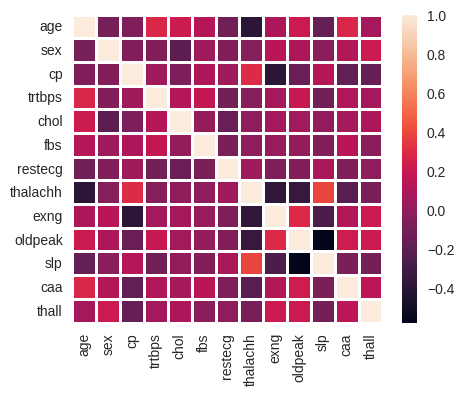

In [17]:
# # calculate the correlation matrix
from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(X)
dfNorm = pd.DataFrame(X_std, index=df.index, columns=df.columns[0:13])
corr = dfNorm.corr()

# plot the heatmap
fig = plt.figure(figsize=(5,4))
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns,
            linewidths=.75)

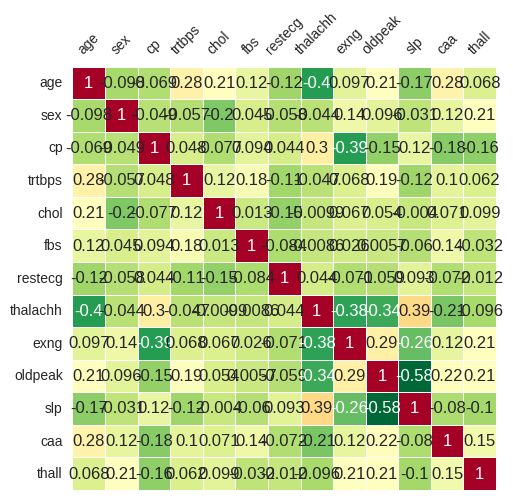

In [18]:
ax = sns.heatmap(X.corr(), cmap='RdYlGn_r', linewidths=0.5, annot=True, cbar=False, square=True)
plt.yticks(rotation=0)
ax.tick_params(labelbottom=False,labeltop=True)
ax.set_xticklabels(ax.get_xticklabels(),rotation=45);

Observation & Variables

In [19]:
observations = list(df.index)
variables = list(df.columns)

### Box and Whisker Plots

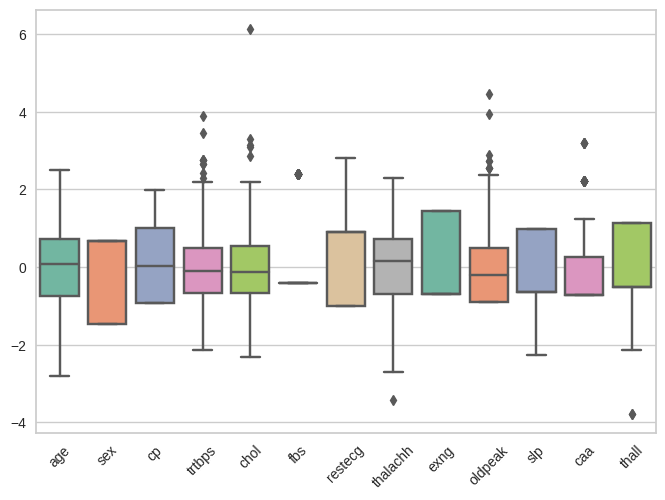

In [20]:
ax = plt.figure()
ax = sns.boxplot(data=X, orient="v", palette="Set2")
ax.set_xticklabels(ax.get_xticklabels(),rotation=45);

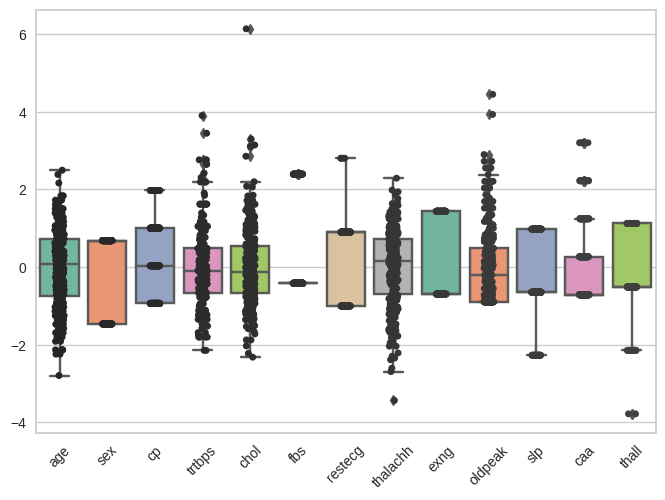

In [21]:
ax = plt.figure()    
ax = sns.boxplot(data=X, orient="v", palette="Set2")
ax = sns.stripplot(data=X, color=".25") 
ax.set_xticklabels(ax.get_xticklabels(),rotation=45);

### PCA

In [22]:
from pca import pca
# Initialize and keep all PCs
model = pca()
# Fit transform
out = model.fit_transform(X)

[pca] >Extracting column labels from dataframe.
[pca] >Extracting row labels from dataframe.
[pca] >The PCA reduction is performed to capture [95.0%] explained variance using the [13] columns of the input data.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Number of components is [12] that covers the [95.00%] explained variance.
[pca] >The PCA reduction is performed on the [13] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[12]
[pca] >Multiple test correction applied for Hotelling T2 test: [fdr_bh]
[pca] >Outlier detection using SPE/DmodX with n_std=[3]


Text(0, 0.5, '$Z_2$')

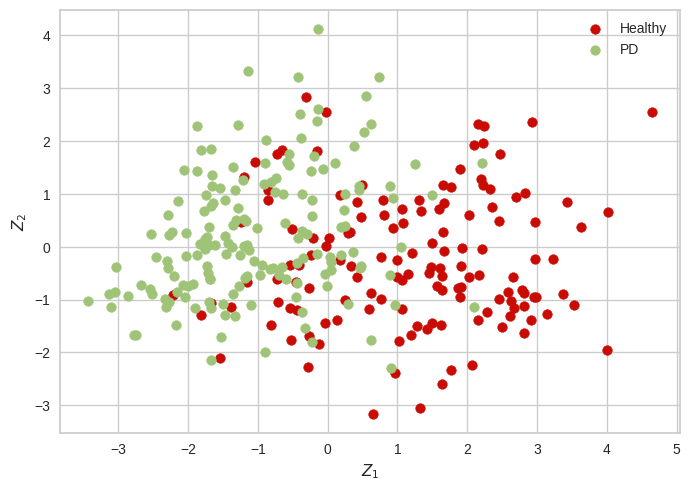

In [23]:
pca = PCA()
Z = pca.fit_transform(X)

# 1(Healthy)->0,  2(PD)->1, 
idx_Healthy = np.where(y == 0)
idx_PD = np.where(y == 1)

plt. figure()
plt.scatter(Z[idx_Healthy,0], Z[idx_Healthy,1], c='r', label='Healthy')
plt.scatter(Z[idx_PD,0], Z[idx_PD,1], c='g', label='PD')
plt.legend()
plt.xlabel('$Z_1$')
plt.ylabel('$Z_2$')

### Eigen values and Eigen Vectors

In [24]:
from numpy.linalg import eig

In [25]:
cov_matrix = np.cov(X_std.T)

eigenvalues, eigenvectors = eig(cov_matrix)

In [26]:
eigenvalues

array([2.772176  , 1.54178039, 0.37309206, 0.42454351, 1.22688342,
       1.18505659, 0.53186008, 1.02535054, 0.97322784, 0.86562678,
       0.77851473, 0.72130605, 0.62362837])

In [27]:
eigenvectors

array([[ 0.31420252, -0.40614872, -0.18181083,  0.54823509, -0.09407661,
        -0.0206618 , -0.14054369,  0.30715312,  0.12829615,  0.22373018,
        -0.2624772 ,  0.37900026,  0.01672242],
       [ 0.09083783,  0.37779171, -0.06093808, -0.01101603,  0.55484915,
        -0.25530873, -0.28760018, -0.0507044 , -0.05496875,  0.16250682,
        -0.17599193,  0.1989252 , -0.53561904],
       [-0.27460749, -0.29726609, -0.00635061, -0.09720829,  0.35697431,
         0.28790041,  0.59428374, -0.16317945,  0.19341117,  0.21538959,
         0.04794993,  0.35143235, -0.16435134],
       [ 0.18392019, -0.43818675, -0.0201296 , -0.25872142,  0.2038493 ,
         0.02260103, -0.06413037, -0.18813809,  0.17945982, -0.33276335,
        -0.59533383, -0.35039179, -0.07152427],
       [ 0.11737503, -0.36451402,  0.00745311, -0.18379048, -0.40782498,
        -0.34340982, -0.10887361, -0.3200667 ,  0.10472957, -0.04932936,
         0.37238051,  0.1539752 , -0.49516986],
       [ 0.07363999, -0.317433

In [28]:
from tabulate import tabulate
eigenvector_matrix = np.column_stack(eigenvectors)

# Create a list of column names
column_names = ["PC{}".format(i+1) for i in range(len(eigenvectors))]

# Display the eigenvectors using tabulate
print("Eigenvector matrix:\n")
print(tabulate(eigenvector_matrix, headers=column_names))

Eigenvector matrix:

       PC1         PC2          PC3         PC4          PC5         PC6          PC7         PC8         PC9        PC10        PC11        PC12        PC13
----------  ----------  -----------  ----------  -----------  ----------  -----------  ----------  ----------  ----------  ----------  ----------  ----------
 0.314203    0.0908378  -0.274607     0.18392     0.117375     0.07364    -0.127728    -0.416498    0.361267    0.419639   -0.379772    0.273262    0.222024
-0.406149    0.377792   -0.297266    -0.438187   -0.364514    -0.317433    0.220882    -0.0778762   0.263118    0.052255   -0.0483742  -0.0941472   0.20072
-0.181811   -0.0609381  -0.00635061  -0.0201296   0.00745311   0.127167   -0.0744423   -0.316692   -0.148727    0.614575    0.645164   -0.156264   -0.0156897
 0.548235   -0.011016   -0.0972083   -0.258721   -0.18379      0.0247296  -0.00269438   0.608911    0.239079    0.340833    0.133566   -0.14603    -0.0725932
-0.0940766   0.554849    0.356974 

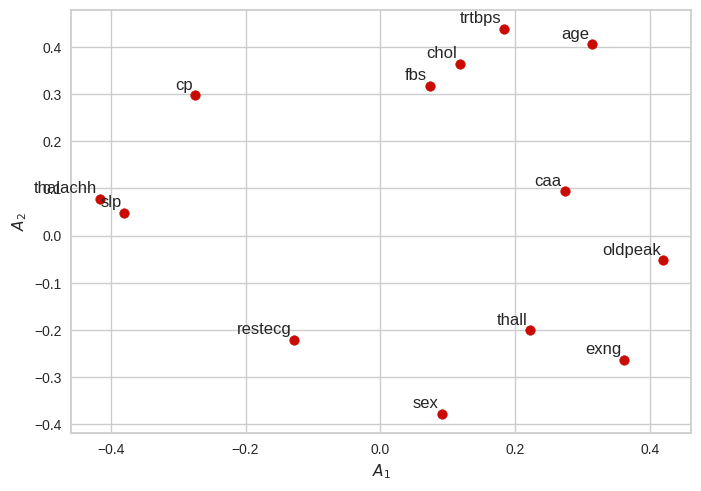

In [29]:
A = pca.components_.T 
plt.scatter(A[:,0],A[:,1],c='r')
plt.xlabel('$A_1$')
plt.ylabel('$A_2$')
for label, x, y in zip(variables, A[:, 0], A[:, 1]):
  plt.annotate(label, xy=(x, y), xytext=(-2, 2), textcoords='offset points', ha='right', va='bottom')

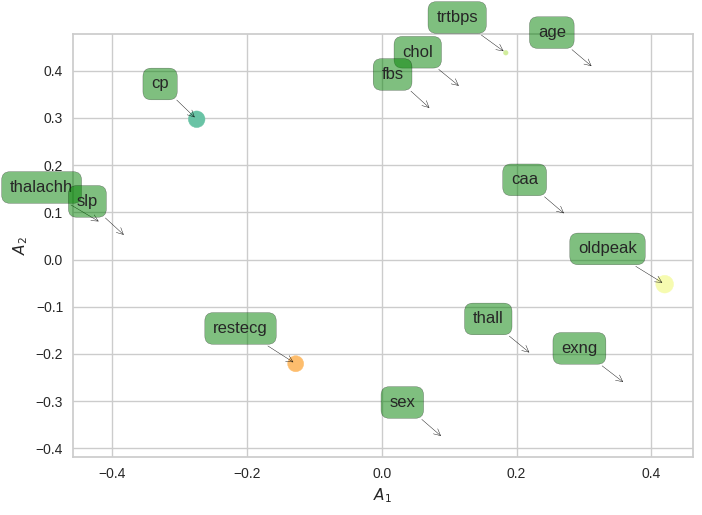

In [30]:
plt.scatter(A[:, 0],A[:, 1], marker='o', c=A[:, 2], s=A[:, 3]*500, cmap=plt.get_cmap('Spectral'))

plt.xlabel('$A_1$')
plt.ylabel('$A_2$')
for label, x, y in zip(variables,A[:, 0],A[:, 1]):
  plt.annotate(label,xy=(x, y), xytext=(-20, 20),
      textcoords='offset points', ha='right', va='bottom',
      bbox=dict(boxstyle='round,pad=0.5', fc='green', alpha=0.5),
      arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))

### Scree Plot

Text(0, 0.5, 'Explained variance')

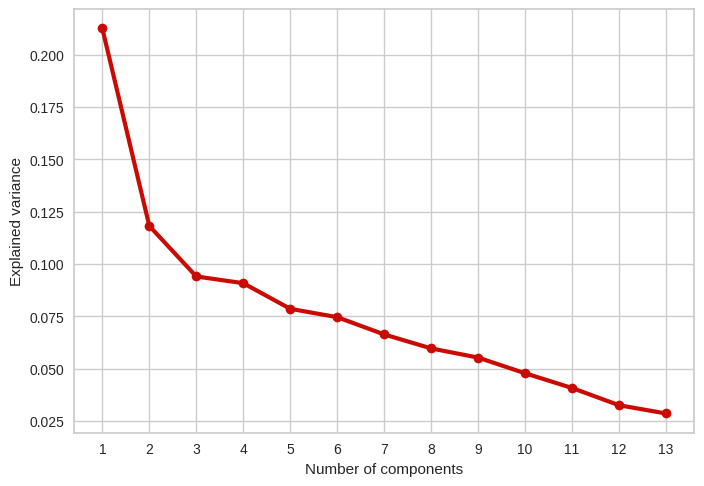

In [31]:
#Eigenvalues
Lambda = pca.explained_variance_ 

#Scree plot
x = np.arange(len(Lambda)) + 1
plt.plot(x,Lambda/sum(Lambda), 'ro-', lw=3)
plt.xticks(x, [""+str(i) for i in x], rotation=0)
plt.xlabel('Number of components')
plt.ylabel('Explained variance') 

### Explained Variance

Text(0, 0.5, 'Cumulative explained variance')

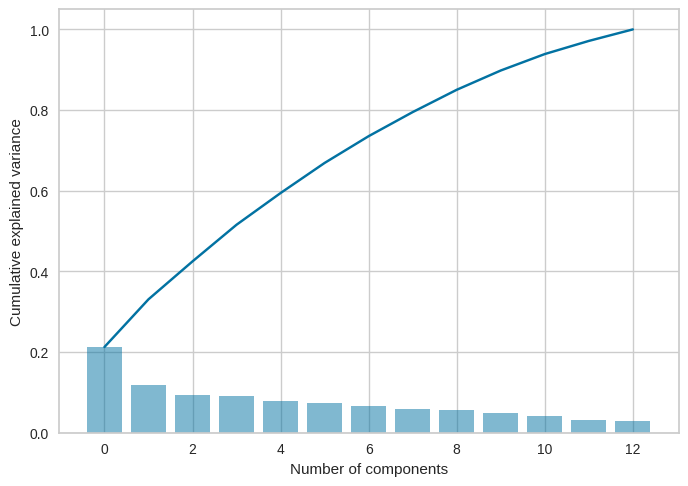

In [32]:
ell = pca.explained_variance_ratio_
ind = np.arange(len(ell))
plt.bar(ind, ell, align='center', alpha=0.5)
plt.plot(np.cumsum(ell))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')

### Biplot

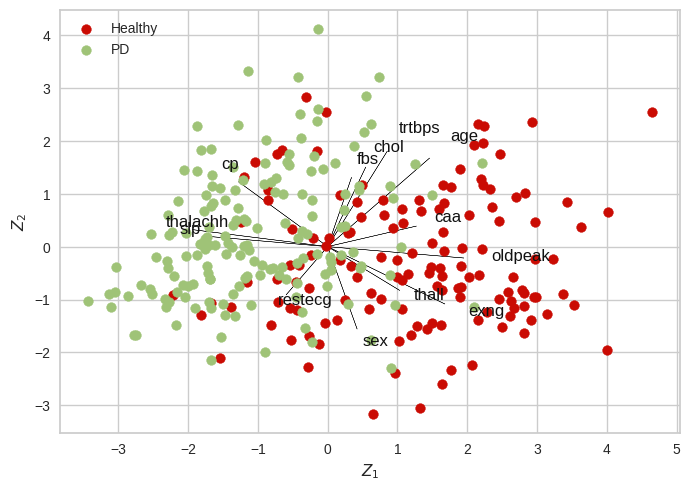

In [33]:
# 0,1 denote PC1 and PC2; change values for other PCs
A1 = A[:,0] 
A2 = A[:,1]
Z1 = Z[:,0] 
Z2 = Z[:,1]

plt.figure()
plt.xlabel('$Z_1$')
plt.ylabel('$Z_2$')
for i in range(len(A1)):
# arrows project features as vectors onto PC axes
  plt.arrow(0, 0, A1[i]*max(Z1), A2[i]*max(Z2), color='k', width=0.0005, head_width=0.0025)
  plt.text(A1[i]*max(Z1)*1.2, A2[i]*max(Z2)*1.2,variables[i], color='k')

plt.scatter(Z[idx_Healthy,0], Z[idx_Healthy,1], c='r', label='Healthy')
plt.scatter(Z[idx_PD,0], Z[idx_PD,1], c='g', label='PD')
plt.legend(loc='upper left')

[pca]> [WARNING]: De parameter <label> is deprecated and will not be supported in future version.
[pca] >Plot PC1 vs PC2 with loadings.


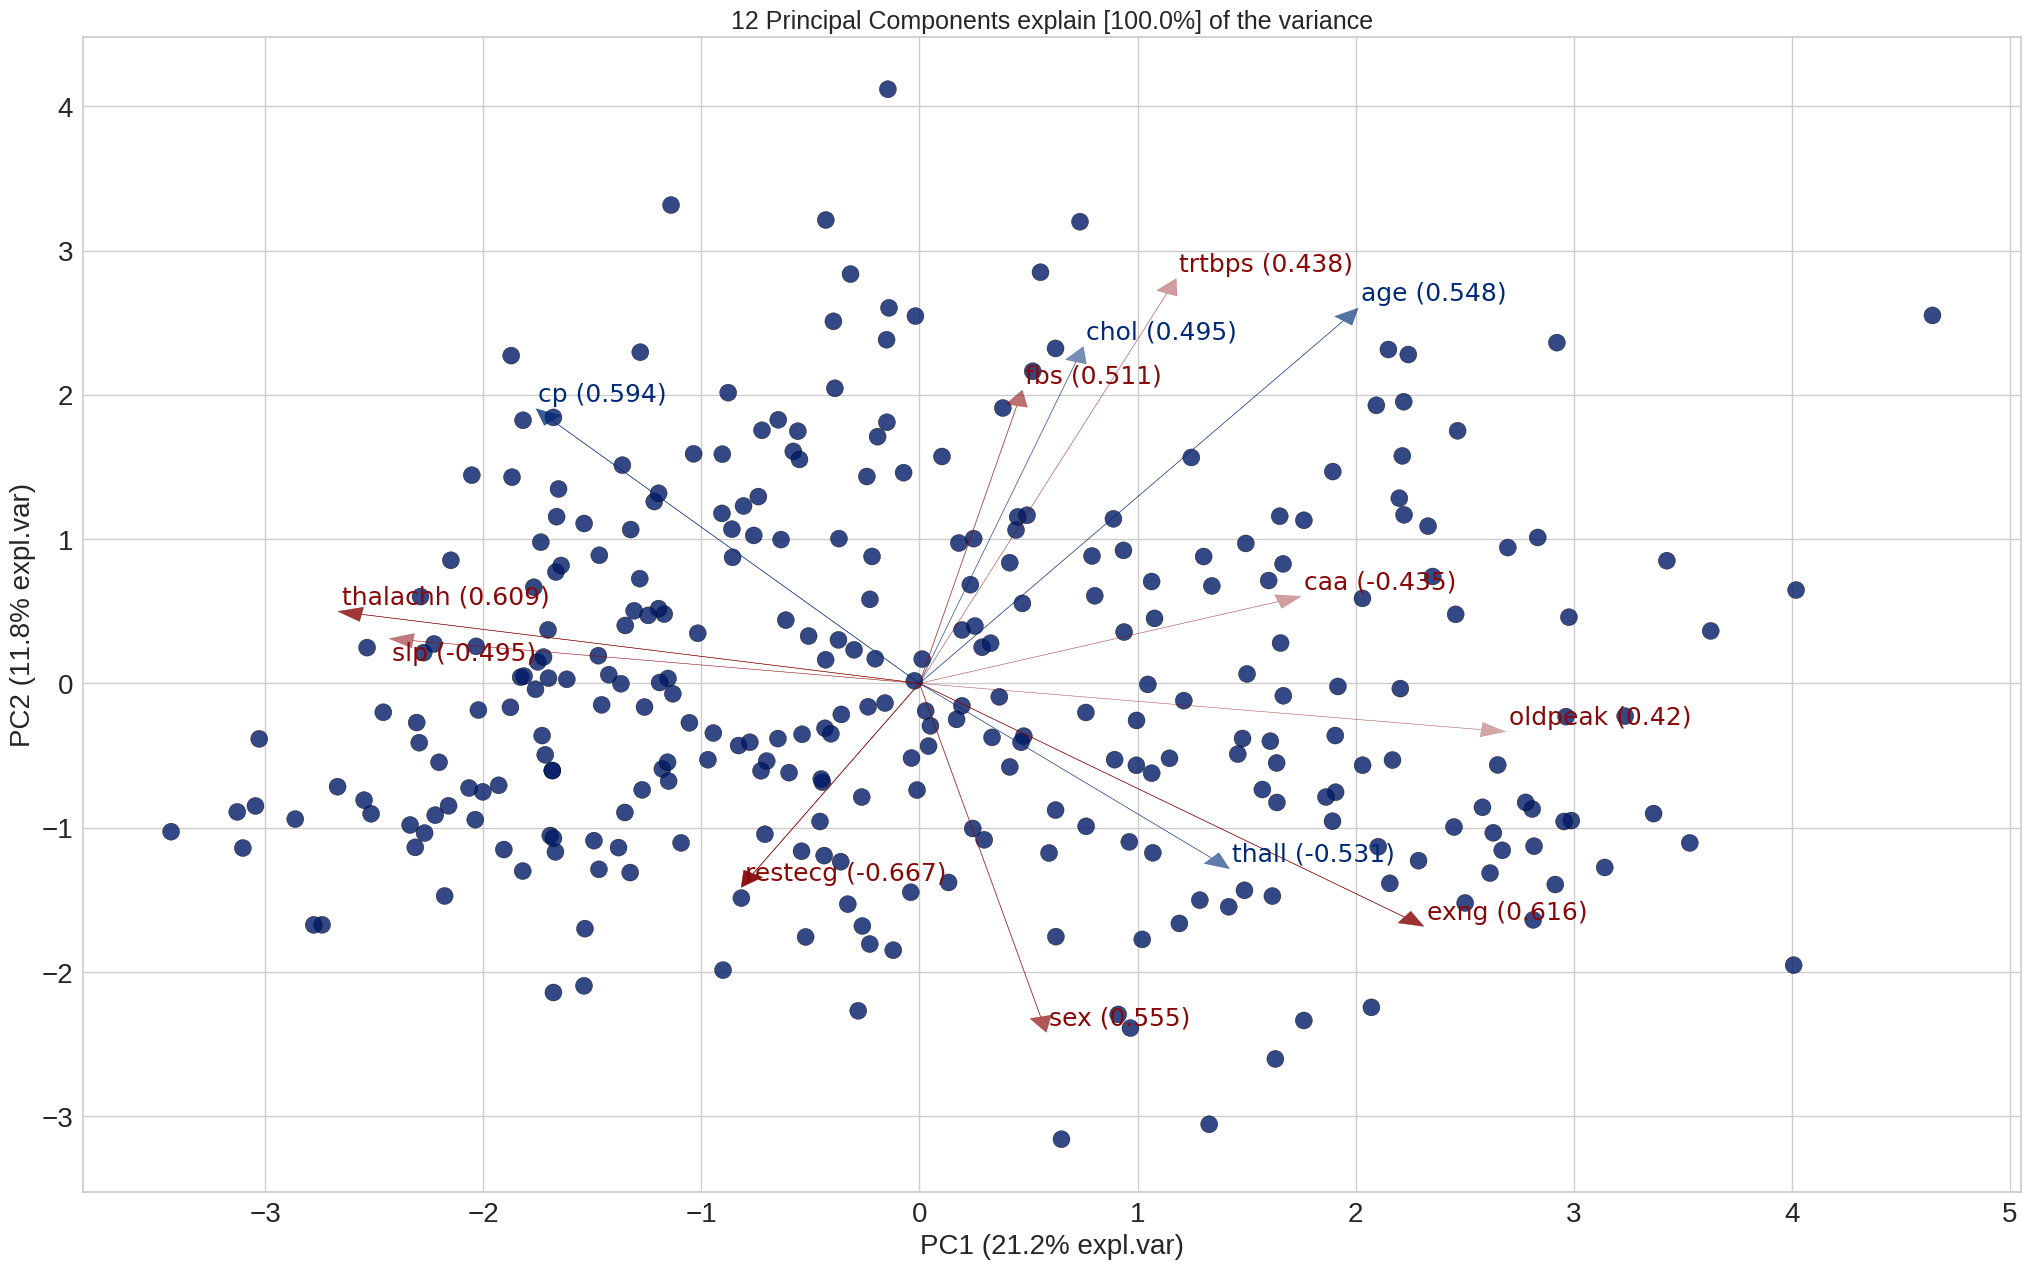

(<Figure size 2500x1500 with 1 Axes>,
 <Axes: title={'center': '12 Principal Components explain [100.0%] of the variance'}, xlabel='PC1 (21.2% expl.var)', ylabel='PC2 (11.8% expl.var)'>)

In [34]:
model.biplot(label=False, legend=False)

[pca]> [WARNING]: De parameter <label> is deprecated and will not be supported in future version.
[pca] >Plot PC1 vs PC2 vs PC3 with loadings.


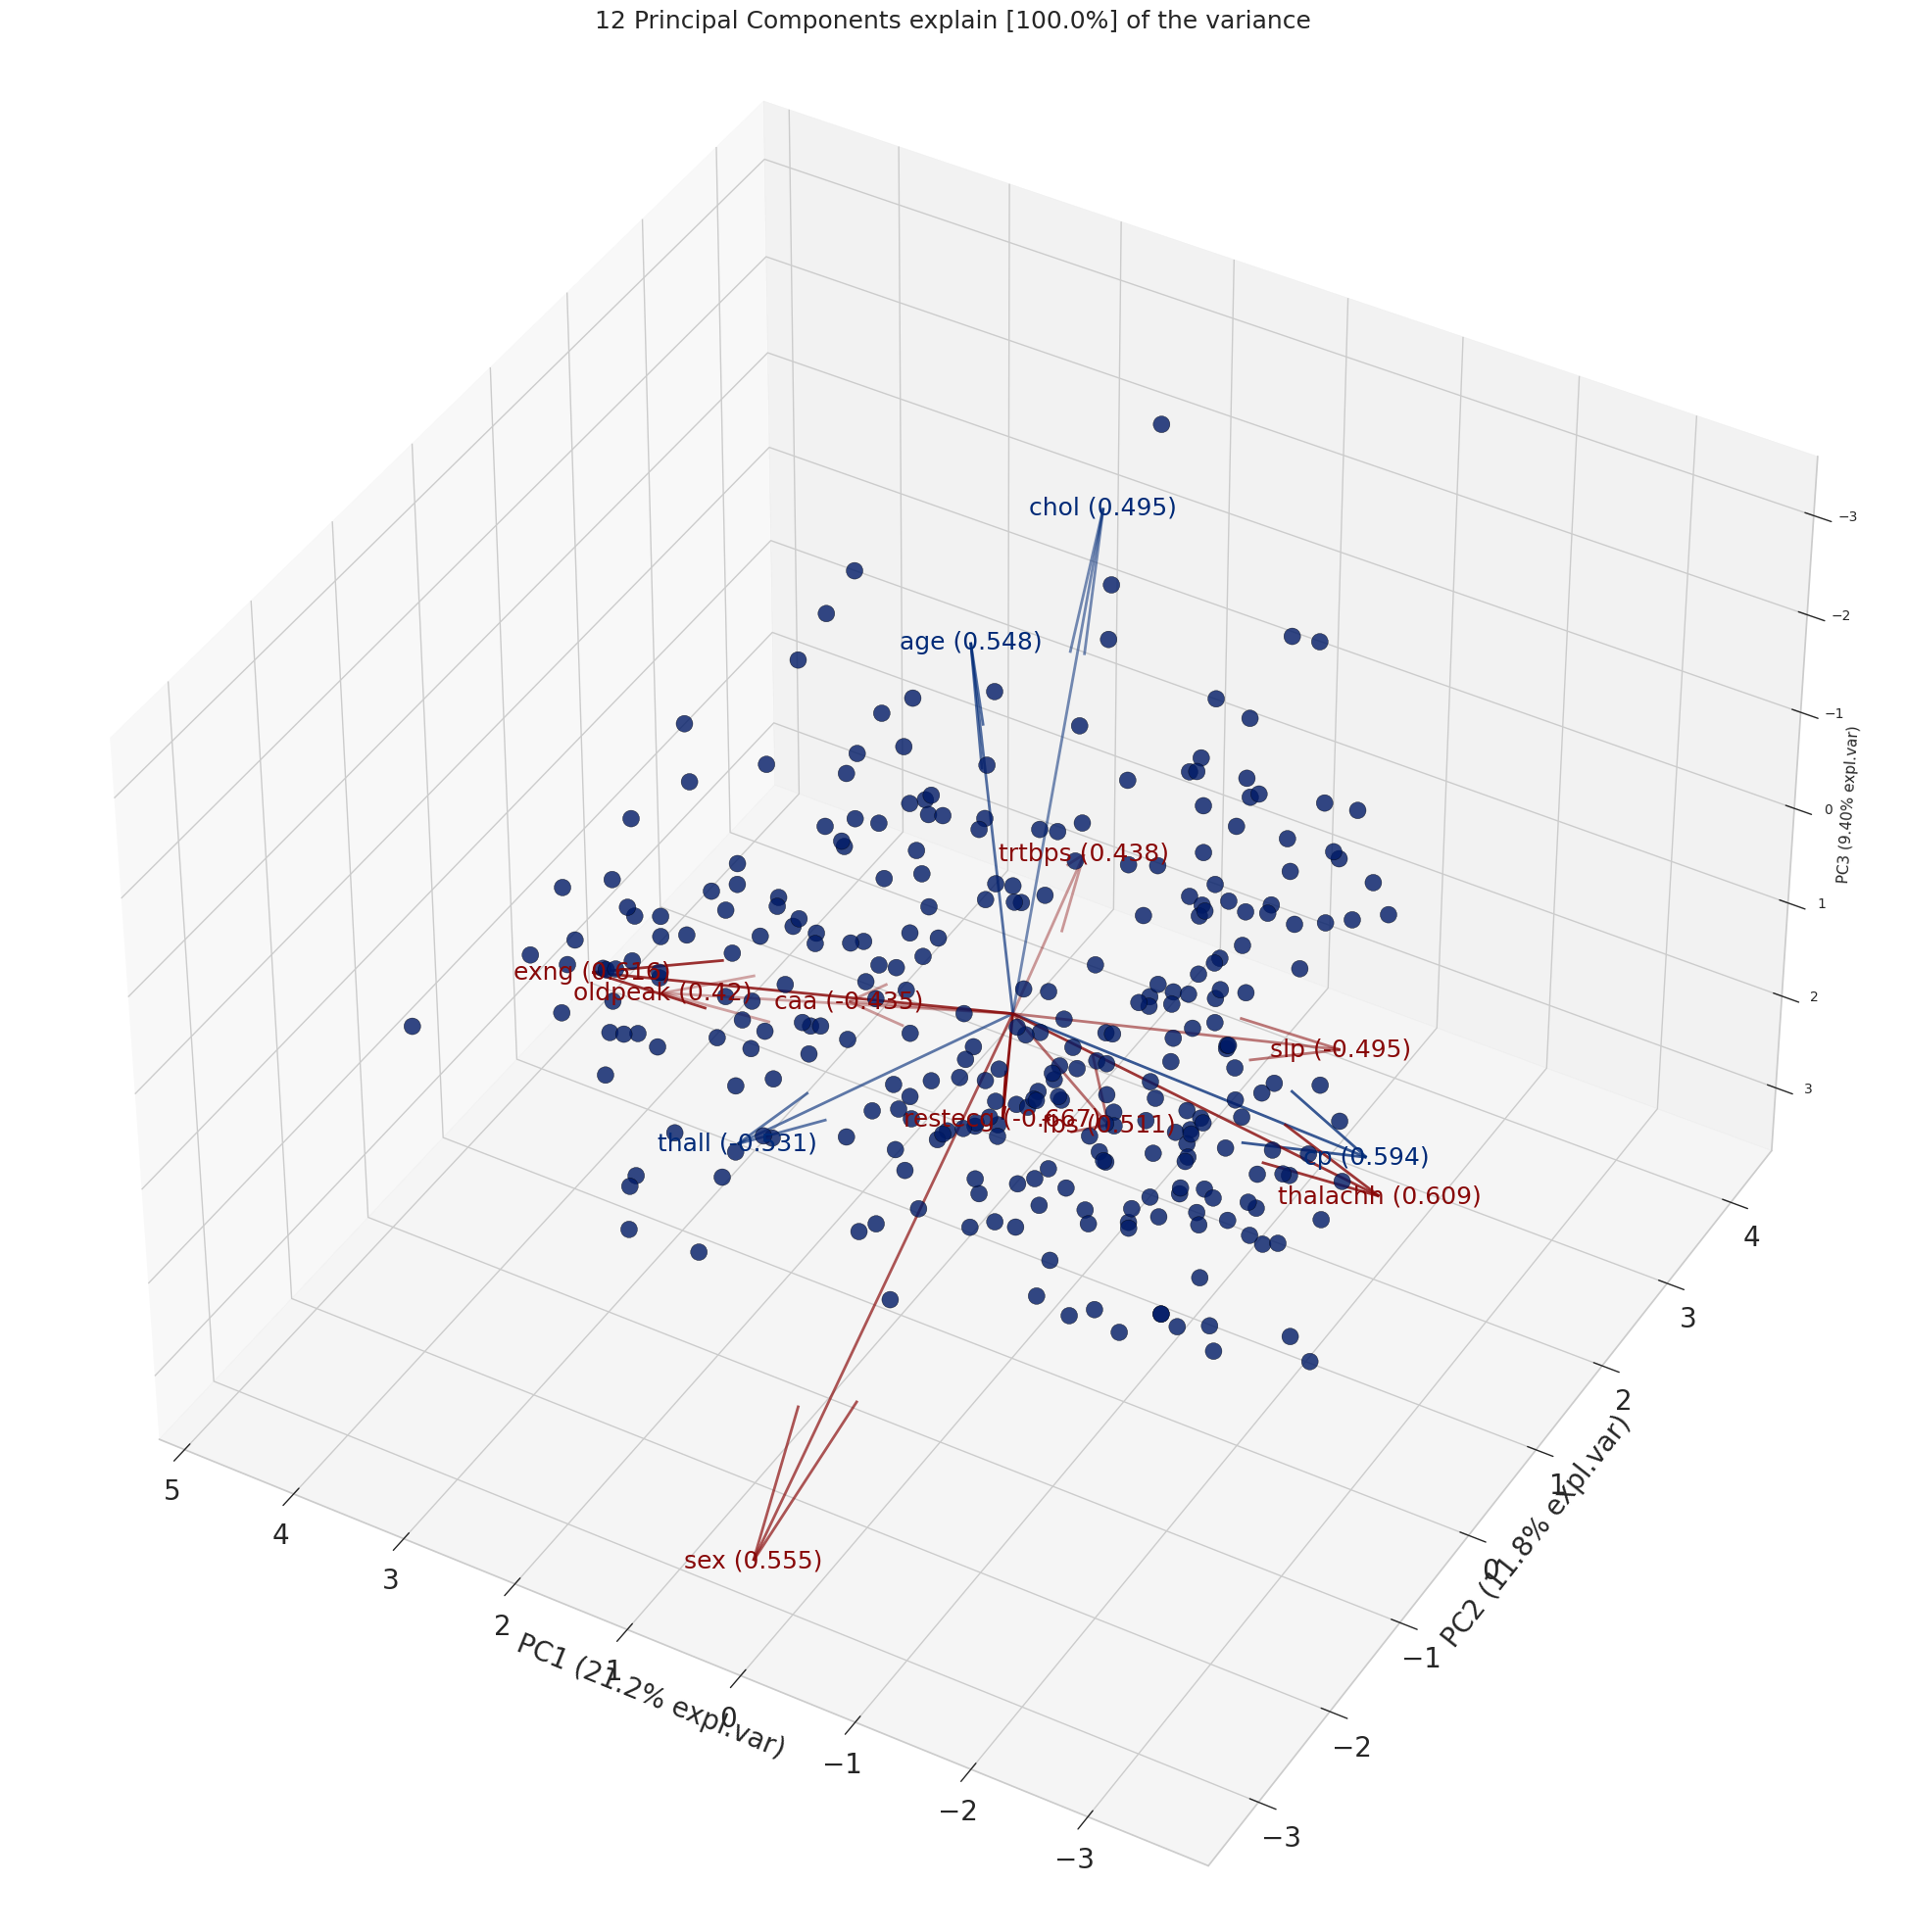

(<Figure size 3000x2500 with 1 Axes>,
 <Axes3D: title={'center': '12 Principal Components explain [100.0%] of the variance'}, xlabel='PC1 (21.2% expl.var)', ylabel='PC2 (11.8% expl.var)', zlabel='PC3 (9.40% expl.var)'>)

In [35]:
model.biplot3d(label = False, legend=False)

### Scatter Plot

[pca]> [WARNING]: De parameter <label> is deprecated and will not be supported in future version.


(<Figure size 2500x1500 with 1 Axes>,
 <Axes: title={'center': '12 Principal Components explain [100.0%] of the variance'}, xlabel='PC1 (21.2% expl.var)', ylabel='PC2 (11.8% expl.var)'>)

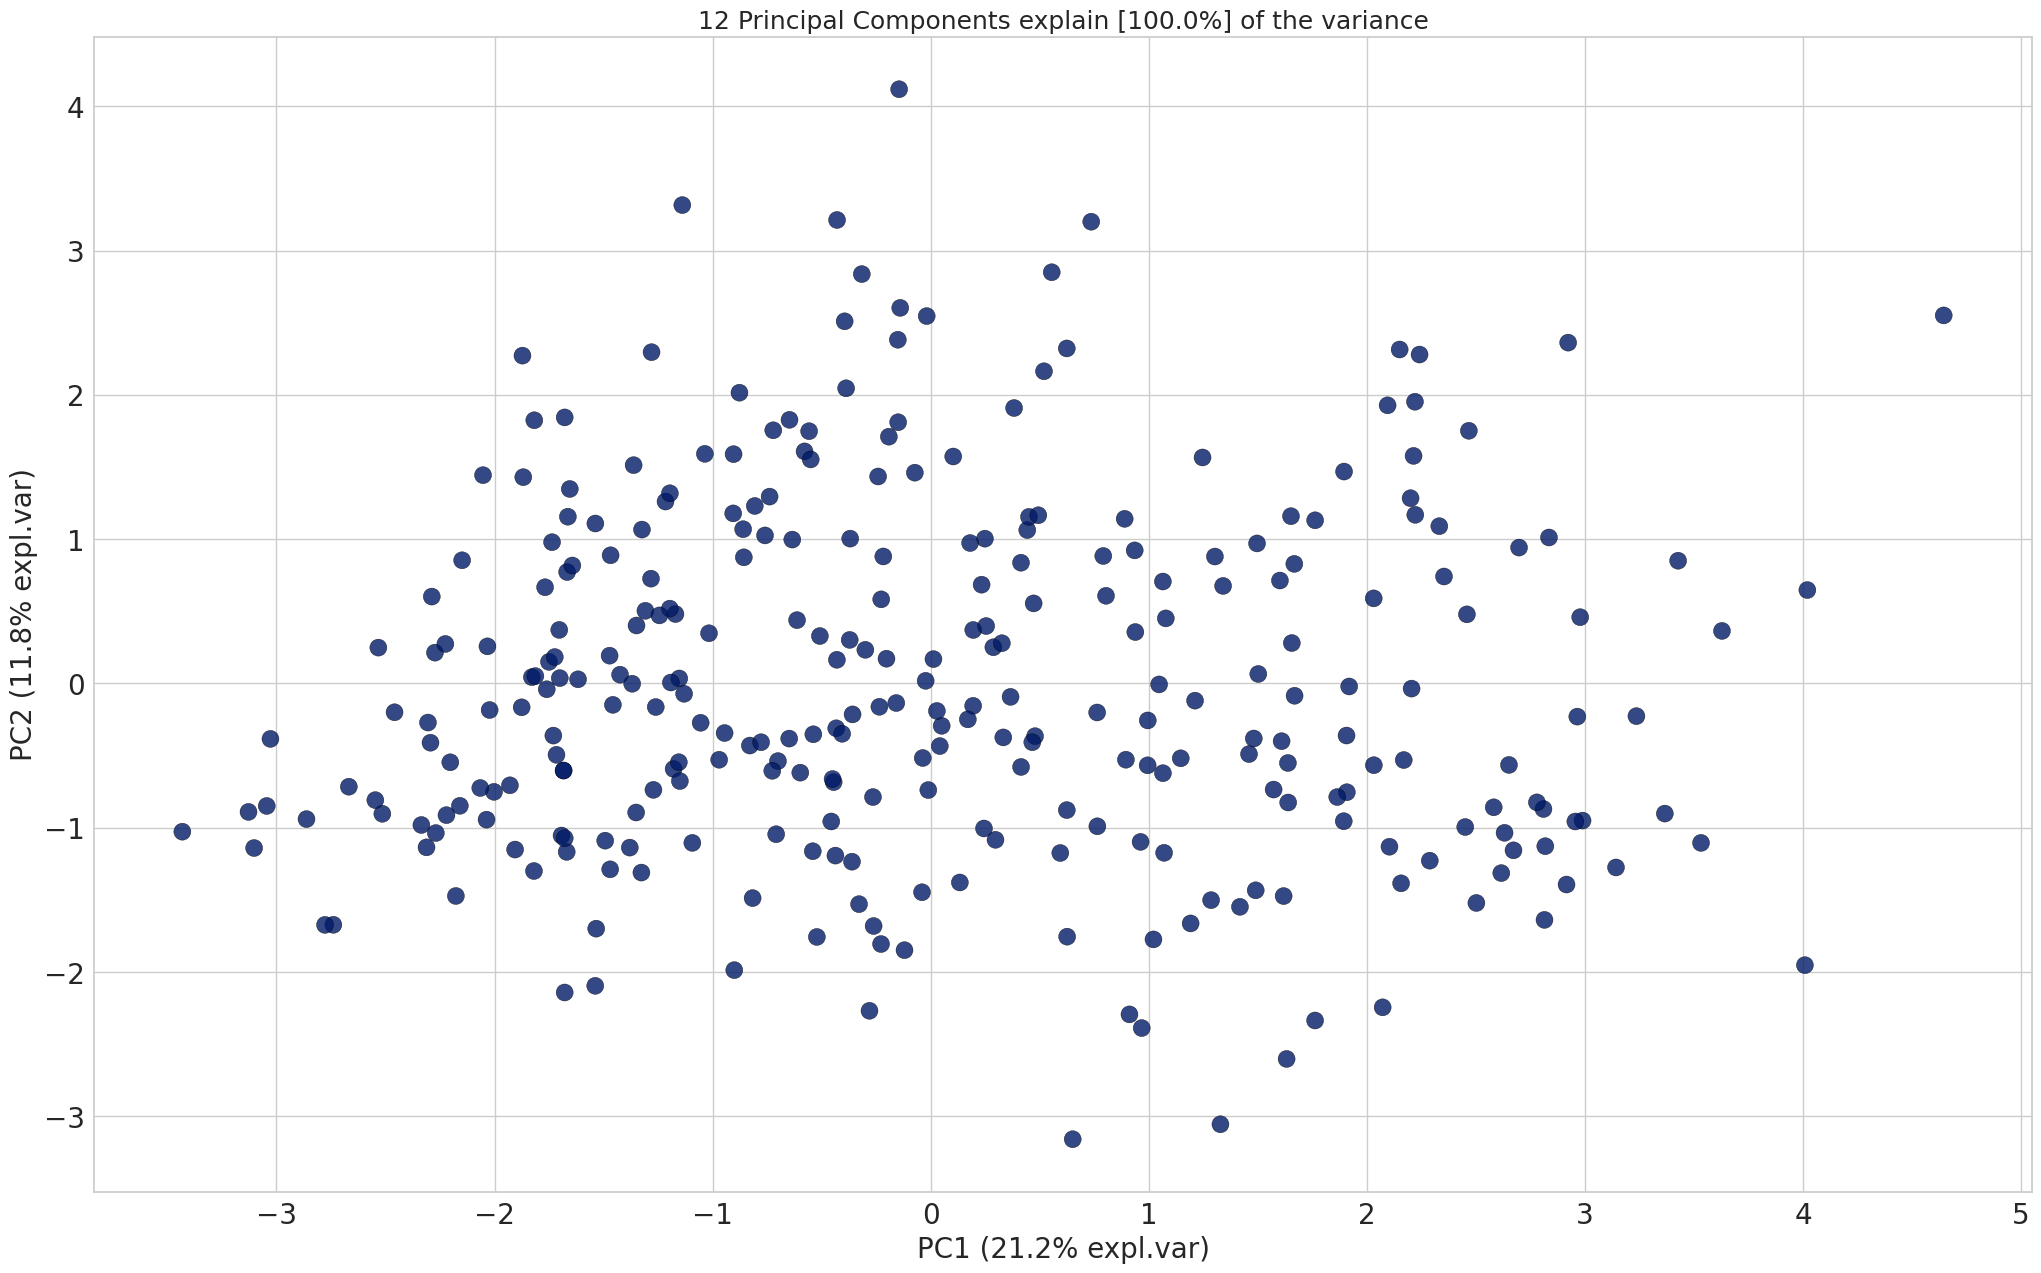

In [36]:
model.scatter(label=True, legend=False)

### Explained Variance Plot

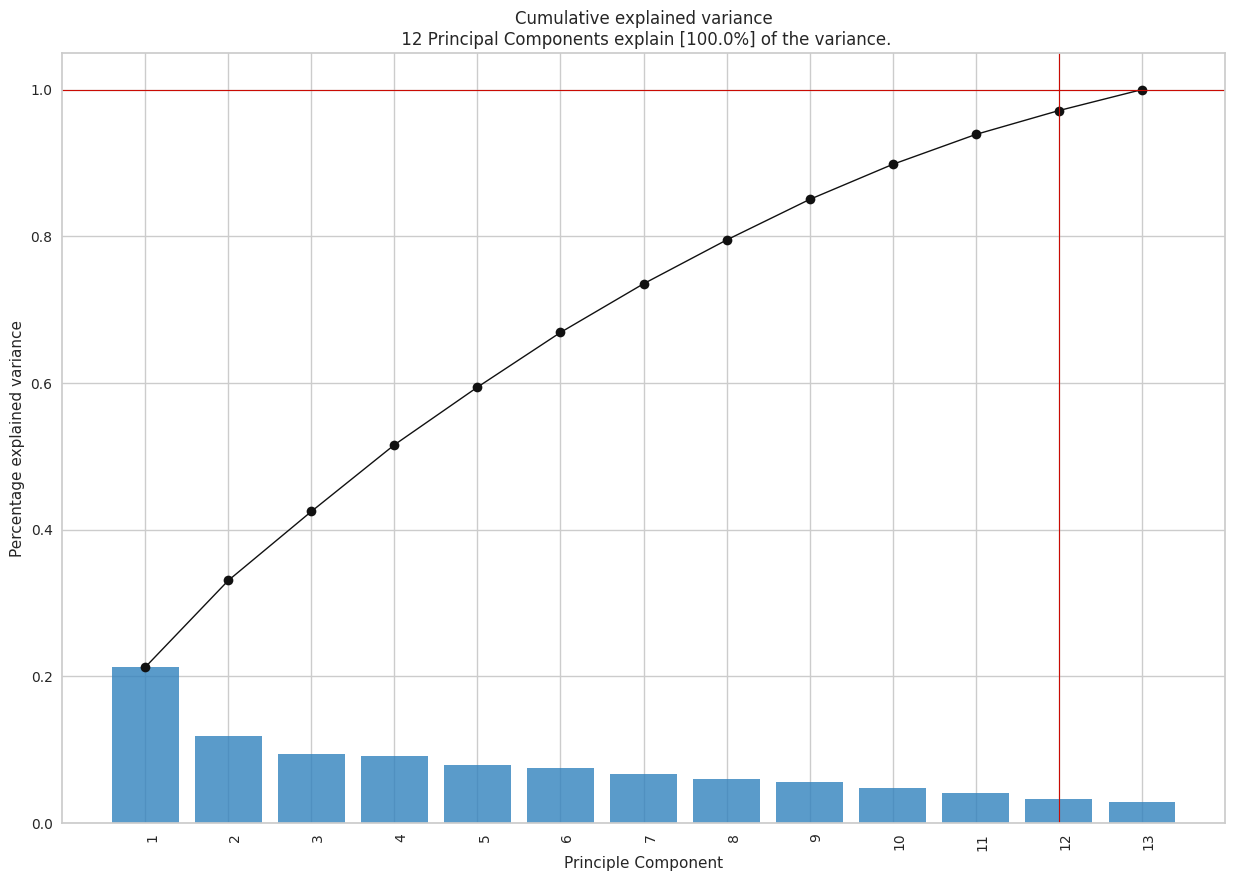

<Figure size 800x550 with 0 Axes>

In [37]:
model.plot();

# 4. Train and Evaluate Model

In [38]:
cat_features = ['sex', 'cp', 'fbs', 'restecg', 'exng', 'thalachh']

In [39]:
#setup??

In [40]:
experiment = setup(df, target='output', categorical_features=cat_features)

In [41]:
from pycaret.classification import *
clf_pca = setup(data=df, target='output', train_size=0.7, session_id=123, normalize = True, pca = True, pca_components = 3)

# Explainable AI with Shapley values
Shapley values are a widely used approach from cooperative game theory that come with desirable properties.

SHAP is a Python library for model interpretation and feature importance analysis, and it provides a variety of tools for explaining the output of machine learning models. The library is based on the Shapley value, a concept from cooperative game theory that assigns a value to each player in a game based on their contribution to the overall outcome.

In [42]:
rf_pca = create_model('rf')

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [43]:
tuned_rf_pca = tune_model(rf_pca)

Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


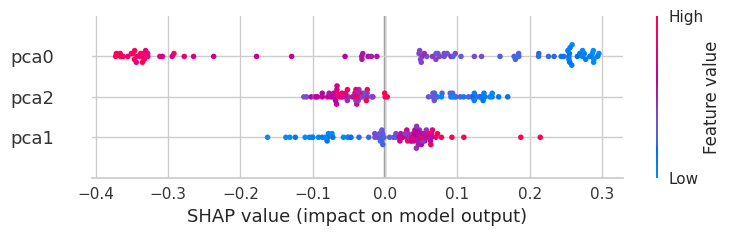

In [44]:
interpret_model(tuned_rf_pca, plot='summary')

In [45]:
interpret_model(tuned_rf_pca, plot='reason', observation=32)

In [46]:
interpret_model(tuned_rf_pca, plot='reason')

#'summary' - Summary Plot using SHAP
#'correlation' - Dependence Plot using SHAP
#'reason' - Force Plot using SHAP
#'pdp' - Partial Dependence Plot
#'msa' - Morris Sensitivity Analysis
#'pfi' - Permutation Feature Importance

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

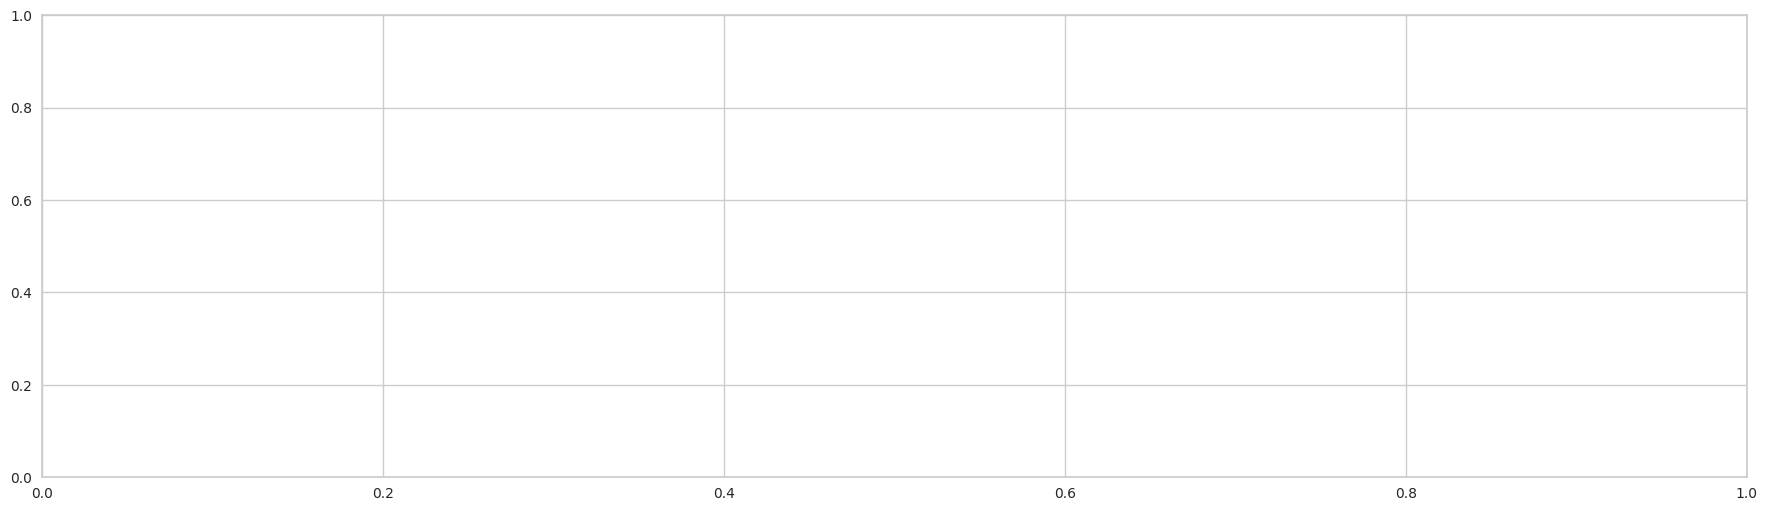

In [48]:
evaluate_model(tuned_rf_pca)